**This code can be used to fit a self-organising map and a DML matrix**

Several files will be loaded in this notebook. If the entire folder was copied from Github and nothing was moved around, only the audio files to be used need to be copied to the folder 'Audio_data', which is present in the Data folder. Alternatively, a different pathway can be specified using the argument Audio_data=... 

The others files and folders needed are: three Templates folders (arrays, dml, rect) (image is not neccesary), the file 'parameters.txt' and the folder 'Modules' containing five modules with code. If *all* of these folders are located somewhere else, the remote control block can be run to change the working directory. If the folders were copied directly from Github, this shouldn't be necessary.

The audio must be of the same type (no mixes of TE and non-TE). The code assumes data is normal, if it is TE, add an argument 'exp_factor' with the expansion factor. If there are multiple channels, add an argument channel='l' or 'r' (left or right).

Press shift+enter to run a block.

**Remote control block** (Optional. Use only if all data is present somewhere else).

In [ ]:
import os
path='C:/Users/arne/Documents/School/Thesis'; #Change this to directory that stores the data
os.chdir(path)

**Import necessary functions** (run unchanged)

In [1]:
import os
path=os.getcwd()
os.chdir(path+'/Modules')
import AD1_Loading as AD1
import AD2_Spectro as AD2
import AD3_Features as AD3
import AD4_SOM as AD4
import AD5_MDS as AD5
os.chdir(path)

**List files** (files to be used to fit the SOM)

There are three options: 

* If 'Full' is set to 'True' every .WAV file inside the Audio_data folder will be analysed. (Make sure there are no mixes of TE and non-TE data)

* If 'Folder_name' is given a name other than 'None', all files within this folder will be analysed (assuming this folder is present within Audio_data). 

* A list of files to be analysed can be provided in List_files. This is location bound. So a file called 'Audio5.WAV' that is in a subfolder 'Location1' must be specified as 'Location1/Audio5.WAV'. 

The code runs in this order. Setting 'Full' to True will ignore the other two commands.

If there are subfolders present, this can be specified by setting 'Subfolders' to True. So if there are four audio files and they are located in folders 'Location1' and 'Location2' which are present in Audio_data, subfolders must be set to True if 'Full' is True. If only Location1 must be analysed, then Full is set to False, Folder_name is set to 'Location1' and 'Subfolders' is set to False. But if there are two folders within Location1 named 'Day1' and 'Day'2, 'Subfolders' must be set to true. If 'Full' is True, there can only be one layer of subfolders (so 'Location1' with 'Day1' and 'Day2' would not work).

The code will ignore every file that doesn't end in .WAV or .wav to prevent errors.

In [2]:
Full=True
Folder_name='None'
List_files=['eser-1_ppip-2µl1µA043_AEI.WAV', 'eser-1_ppip-2µl1µA048_AFT.WAV',
            'ppip-1µl1µB011_ABJ.WAV', 'ppip-1µl1µA045_AAS.WAV', 'mdau-1µl1µA052_AJP.WAV']
Subfolders=False

**Parameters of the map**

map_name is the name under which you want to save the map, Dim1 and Dim2 are the sizes of the map. If Dim1 and Dim2 are left out, the code runs the default size specified in 'parameters.txt'. Maps are saved as 'map_name.npy' and 'map_name_data.npy'. The data part can be useful to visualise what the map does.

In [3]:
map_name='map1'
Dim1=5
Dim2=5

In [4]:
net, raw_data=AD4.fit_SOM(List_files, full=Full, folder=Folder_name, subfolders=Subfolders, 
                          dim1=Dim1, dim2=Dim2, export=map_name) #for non_TE data, add argument 'channel' here

**Visualise the map** (run unchanged)

Shows a two dimensional visualisation of the map.

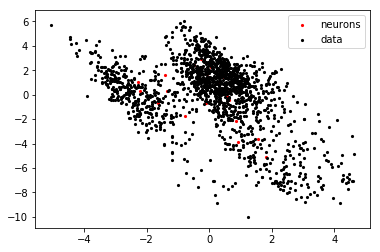

()

In [5]:
#plot MDS
net_features=AD4.calc_net_features(net)
D=AD5.calc_dist_matrix(net_features, 1, raw_data=raw_data)
pos=AD5.calc_pos(D)
AD5.plot_MDS2(pos, Dim1, Dim2)

**Fit a DML-matrix**

A dml is automatically fitted using the data in the Templates folders (Templates_rect, Templates_arrays and Templates_dml). 

Alternate data can be specified the following way (optional arguments): input features 'data_X' with datapoints as colums and rows as features (keep in mind the features code used is the other way around so this must be transposed first). Output is 'data_Y' which is a vector with numbers. Every number specifies a different bat. 

In [6]:
dml_name='D1'
D=AD4.fit_dml(export=dml_name)